# Database that developers love in last 6 years

## CRISP-DM Process
**Business Understanding**:
Every year, StackOverflow send out an anual survey to improve the community. The survey include information to draw overview about developer profile, technology and work...
I am interested in Database part of this survey and got 3 question want to learn from these datasets
1. What is the trend of using Database over 5 years period?
2. What is the most popular and desired Database in 2022?
3. What is the change of desired database 2021 and 2022?


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import split_multiple_choice as ult

sns.set(style='darkgrid')

%matplotlib inline


Read the survey data from 2017 to 2022

In [3]:
df_2022 = pd.read_csv('data/survey_results_public_2022.csv')
df_2021 = pd.read_csv('data/survey_results_public_2021.csv')
df_2020 = pd.read_csv('data/survey_results_public_2020.csv')
df_2019 = pd.read_csv('data/survey_results_public_2019.csv')
df_2018 = pd.read_csv('data/survey_results_public_2018.csv')
df_2017 = pd.read_csv('data/survey_results_public_2017.csv')


C:\Users\giahu\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Data Understanding**

In [10]:
print(f'2022: {df_2022.shape}')
print(f'2021: {df_2021.shape}')
print(f'2020: {df_2020.shape}')
print(f'2019: {df_2019.shape}')
print(f'2018: {df_2018.shape}')
print(f'2017: {df_2017.shape}')

2022: (73268, 79)
2021: (83439, 48)
2020: (64461, 61)
2019: (88883, 85)
2018: (98855, 129)
2017: (51392, 154)


The surveys do not have the same structure so that we have vary of features each year.
Let take a look as database questions in survey

Firstly check the column related to database in 2017

In [22]:
[col for col in df_2017.columns if 'database' in col.lower()]

['HaveWorkedDatabase', 'WantWorkDatabase', 'InfluenceDatabase']

In [23]:
df_2017[df_2017.InfluenceDatabase.notnull()].InfluenceDatabase.head(15)

1               No influence at all
2                    Some influence
6                    Some influence
7               No influence at all
8               No influence at all
11               Not much influence
13    I am the final decision maker
14              No influence at all
17                   Some influence
22              No influence at all
25              No influence at all
26               A lot of influence
27              No influence at all
28               A lot of influence
35               A lot of influence
Name: InfluenceDatabase, dtype: object

We are not interested in and can ignore the InfluenceDatabase in this research

In [15]:
df_2017[df_2017.HaveWorkedDatabase.notnull()].HaveWorkedDatabase.head(15)

1                                 MySQL; SQLite
2                                         MySQL
3     MongoDB; Redis; SQL Server; MySQL; SQLite
5                                         MySQL
6                                        SQLite
7                      Redis; MySQL; PostgreSQL
8                                    SQL Server
9                                    PostgreSQL
10                                   SQL Server
13                     Redis; MySQL; PostgreSQL
17                    MySQL; PostgreSQL; Oracle
19                                        MySQL
21                                   SQL Server
22                             Cassandra; MySQL
23                                        MySQL
Name: HaveWorkedDatabase, dtype: object

Now we check with 2022 dataset

In [24]:
[col for col in df_2022.columns if 'database' in col.lower()]

['DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith']

In [18]:
df_2022[df_2022.DatabaseHaveWorkedWith.notnull()].DatabaseHaveWorkedWith.head(15)

2                                  Microsoft SQL Server
3                                  Microsoft SQL Server
4     Cloud Firestore;Elasticsearch;Microsoft SQL Se...
6     Cloud Firestore;MongoDB;Firebase Realtime Data...
7                                         MongoDB;MySQL
10                                 Microsoft SQL Server
11    Couchbase;CouchDB;Microsoft SQL Server;MongoDB...
12                                           PostgreSQL
13                                  DynamoDB;PostgreSQL
14               Elasticsearch;MongoDB;Neo4j;PostgreSQL
15    Cloud Firestore;Microsoft SQL Server;MongoDB;M...
16                                  Elasticsearch;MySQL
17                                 Cassandra;PostgreSQL
18                                 Microsoft SQL Server
19                                                MySQL
Name: DatabaseHaveWorkedWith, dtype: object

**Prepare Data**

Because the database option is  a multiple choice so we need to split the response into separate rows then count them.

To have a comparasion view, we will need to concat all the data from 2017 to 2022


In [3]:
df_database_current = pd.DataFrame()

df_database_current = ult.create_dataframe_v2(
    df_database_current, df_2017.HaveWorkedDatabase, 2017)
df_database_current = ult.create_dataframe_v2(
    df_database_current, df_2018.DatabaseWorkedWith, 2018)
df_database_current = ult.create_dataframe_v2(
    df_database_current, df_2019.DatabaseWorkedWith, 2019)
df_database_current = ult.create_dataframe_v2(
    df_database_current, df_2020.DatabaseWorkedWith, 2020)
df_database_current = ult.create_dataframe_v2(
    df_database_current, df_2021.DatabaseHaveWorkedWith, 2021)
df_database_current = ult.create_dataframe_v2(
    df_database_current, df_2022.DatabaseHaveWorkedWith, 2022)

df_database_desire = pd.DataFrame()
df_database_desire = ult.create_dataframe_v2(
    df_database_desire, df_2017.WantWorkDatabase, 2017)
df_database_desire = ult.create_dataframe_v2(
    df_database_desire, df_2018.DatabaseDesireNextYear, 2018)
df_database_desire = ult.create_dataframe_v2(
    df_database_desire, df_2019.DatabaseDesireNextYear, 2019)
df_database_desire = ult.create_dataframe_v2(
    df_database_desire, df_2020.DatabaseDesireNextYear, 2020)
df_database_desire = ult.create_dataframe_v2(
    df_database_desire, df_2021.DatabaseWantToWorkWith, 2021)
df_database_desire = ult.create_dataframe_v2(
    df_database_desire, df_2022.DatabaseWantToWorkWith, 2022)


In [4]:
df_database_current

,2017,2018,2019,2020,2021,2022
MYSQL,0.318629,0.393597,0.456071,0.427530,0.422932,0.389256
SQL SERVER,0.221007,0.276091,NaN,NaN,NaN,NaN
SQLITE,0.152514,0.131870,0.266789,0.239432,0.271264,0.265969
POSTGRESQL,0.152066,0.220282,0.289797,0.277563,0.340656,0.362205
MONGODB,0.120486,0.173820,0.214889,0.203006,0.233452,0.235137
ORACLE,0.094840,0.074614,0.138980,0.126511,0.106281,0.095458
REDIS,0.080616,0.120823,0.157184,0.140488,0.174403,0.183859
CASSANDRA,0.017629,0.024723,0.029218,0.025659,0.022448,0.022070
ELASTICSEARCH,NaN,0.094199,0.120608,0.105754,0.111830,0.101409
MARIADB,NaN,0.089555,0.139520,0.128946,0.144872,0.148933


The output data contains a lot of NaN because the reponses were avaible for these year and not in the rest. Therefore we need to do the cleanup

### Clean up the data

We can notice that some databases have diffent names so we need to standardize them by sum them  into the 1 row and drop the redundance.

We need to combine following databases
- 'SQL SERVER' and 'MICROSOFT SQL SERVER'
- 'FIREBASE' and 'FIREBASE REALTIME DATABASE'
- 'DYNAMODB' and 'AMAZON DYNAMODB'

In [5]:
df_database_current.loc['SQL SERVER'] = df_database_current.loc[['SQL SERVER', 'MICROSOFT SQL SERVER']].sum()
df_database_desire.loc['SQL SERVER'] = df_database_desire.loc[['SQL SERVER', 'MICROSOFT SQL SERVER']].sum()

df_database_current.loc['FIREBASE'] = df_database_current.loc[['FIREBASE', 'FIREBASE REALTIME DATABASE']].sum()
df_database_desire.loc['FIREBASE'] = df_database_desire.loc[['FIREBASE', 'FIREBASE REALTIME DATABASE']].sum()

df_database_current.loc['DYNAMODB'] = df_database_current.loc[['DYNAMODB', 'AMAZON DYNAMODB']].sum()
df_database_desire.loc['DYNAMODB'] = df_database_desire.loc[['DYNAMODB', 'AMAZON DYNAMODB']].sum()

need_drop_database = ['MICROSOFT SQL SERVER', 'FIREBASE REALTIME DATABASE', 'AMAZON DYNAMODB']

df_database_current.drop(labels=need_drop_database, inplace=True)
df_database_desire.drop(labels=need_drop_database, inplace=True)

In [6]:
df_database_desire

,2017,2018,2019,2020,2021,2022
MYSQL,0.192189,0.222194,0.289707,0.244086,0.243375,0.222075
MONGODB,0.191139,0.211684,0.266271,0.248584,0.241266,0.236079
POSTGRESQL,0.158021,0.202448,0.297537,0.274290,0.324572,0.344107
SQL SERVER,0.143077,0.164352,0.182543,0.153209,0.136555,0.134670
REDIS,0.120272,0.143523,0.201535,0.185802,0.206282,0.221256
SQLITE,0.112819,0.085206,0.200342,0.169234,0.184338,0.192239
CASSANDRA,0.061313,0.058469,0.068135,0.065575,0.050660,0.043375
ORACLE,0.059036,0.044014,0.082119,0.074371,0.054615,0.047920
ELASTICSEARCH,NaN,0.142208,0.173712,0.159306,0.139551,0.116463
"MICROSOFT AZURE (TABLES, COSMOSDB, SQL, ETC)",NaN,0.084214,NaN,NaN,NaN,NaN


Because many databases only appeared in 2017 or 2018 survey, that not make sense when we are analyzing them in the trend. We will drop them
 
Get the list of Database got most NaN then drop them

In [7]:
need_drop_database = df_database_current.index[df_database_current.isnull().mean(axis=1) > 0.6]

df_database_current.drop(labels=need_drop_database, inplace=True)
df_database_desire.drop(labels=need_drop_database, inplace=True)


In [8]:
df_database_current

,2017,2018,2019,2020,2021,2022
MYSQL,0.318629,0.393597,0.456071,0.427530,0.422932,0.389256
SQL SERVER,0.221007,0.276091,0.276656,0.253425,0.226465,0.223222
SQLITE,0.152514,0.131870,0.266789,0.239432,0.271264,0.265969
POSTGRESQL,0.152066,0.220282,0.289797,0.277563,0.340656,0.362205
MONGODB,0.120486,0.173820,0.214889,0.203006,0.233452,0.235137
ORACLE,0.094840,0.074614,0.138980,0.126511,0.106281,0.095458
REDIS,0.080616,0.120823,0.157184,0.140488,0.174403,0.183859
CASSANDRA,0.017629,0.024723,0.029218,0.025659,0.022448,0.022070
ELASTICSEARCH,NaN,0.094199,0.120608,0.105754,0.111830,0.101409
MARIADB,NaN,0.089555,0.139520,0.128946,0.144872,0.148933


In [23]:
df_database_desire

,2017,2018,2019,2020,2021,2022
MYSQL,0.192189,0.222194,0.289707,0.244086,0.243375,0.222075
MONGODB,0.191139,0.211684,0.266271,0.248584,0.241266,0.236079
POSTGRESQL,0.158021,0.202448,0.297537,0.274290,0.324572,0.344107
SQL SERVER,0.143077,0.164352,0.182543,0.153209,0.136555,0.134670
REDIS,0.120272,0.143523,0.201535,0.185802,0.206282,0.221256
SQLITE,0.112819,0.085206,0.200342,0.169234,0.184338,0.192239
CASSANDRA,0.061313,0.058469,0.068135,0.065575,0.050660,0.043375
ORACLE,0.059036,0.044014,0.082119,0.074371,0.054615,0.047920
ELASTICSEARCH,0.000000,0.142208,0.173712,0.159306,0.139551,0.116463
MARIADB,0.000000,0.072106,0.112350,0.095034,0.097988,0.098010


In [9]:
df_database_current.index[df_database_current.isnull().mean(axis=1) > 0.75]

Index([], dtype='object')

With the remaining data got NaN, they are mostly in 2017 and 2018 when people not name it in the interested list. Hence we can sees them as 0.0 for these year and not impact for analyze trend.


Replace remaining NaN with 0

In [10]:
df_database_current.replace(np.nan,0, inplace=True)
df_database_desire.replace(np.nan,0, inplace=True)

# 1. What is the trend of using Database over 5 years period?

Text(0.5, 1.0, 'Database Want To Work With')

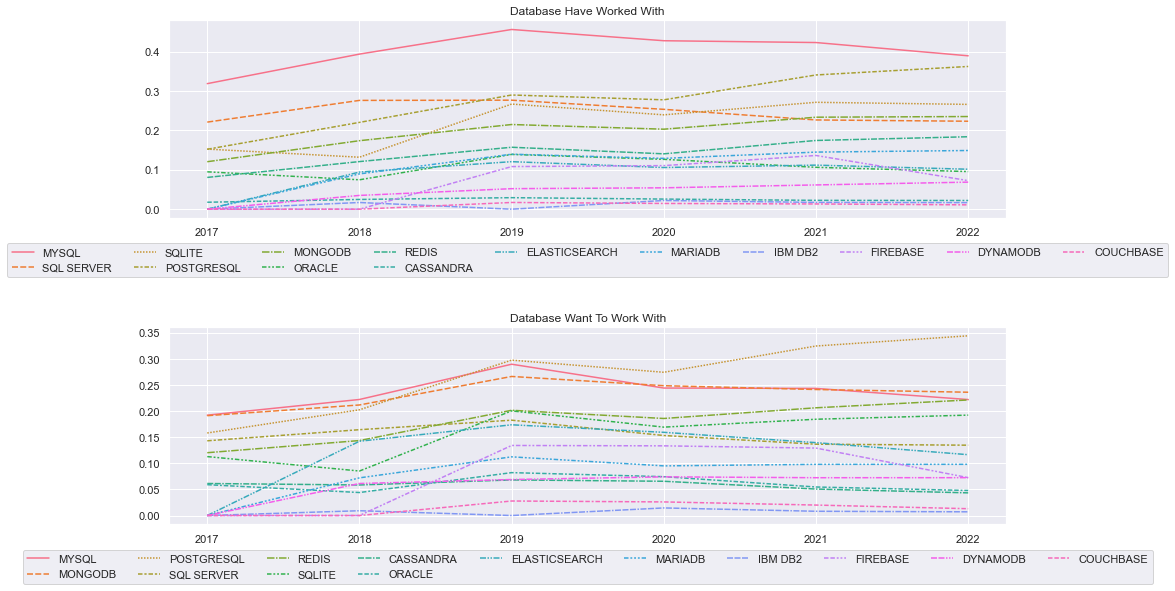

In [11]:
fig, axes = plt.subplots(2, figsize=(15,8))


sns.lineplot(data=df_database_current.T, ax=axes[0])
sns.lineplot(data=df_database_desire.T, ax=axes[1])

pos = axes[1].get_position()
pos.y0 = pos.y0 - 0.12
pos.y1 = pos.y1 - 0.12
axes[1].set_position(pos)

axes[0].legend(bbox_to_anchor=(0.5,-0.3), loc='lower center', borderaxespad=0., ncol=10)
axes[1].legend(bbox_to_anchor=(0.5,-0.3), loc='lower center', borderaxespad=0., ncol=10)

axes[0].set_title('Database Have Worked With')
axes[1].set_title('Database Want To Work With')

# 2. What is the most popular and desired Database in 2022?

In [12]:
db_current_2022 = df_2022.DatabaseHaveWorkedWith.str.split(pat=';').explode().str.strip().str.upper().value_counts();
db_desire_2022 = df_2022.DatabaseWantToWorkWith.str.split(pat=';').explode().str.strip().str.upper().value_counts();

db_2022 = pd.concat([db_current_2022, db_desire_2022], axis=1, join='inner')

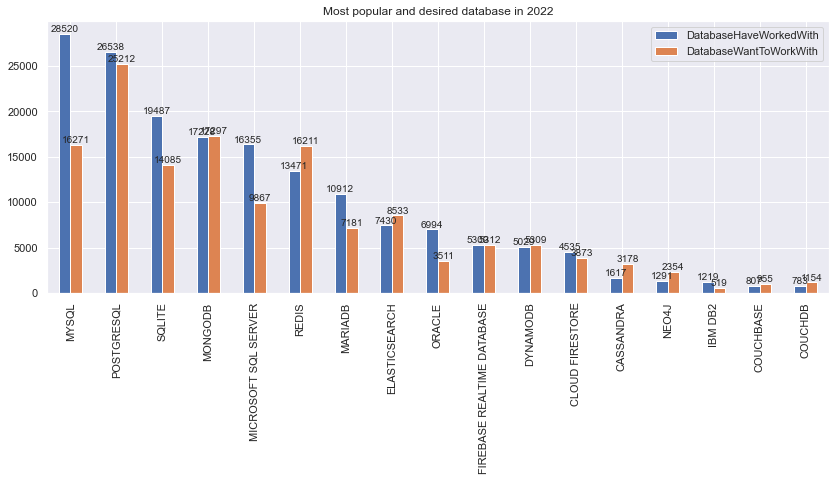

In [13]:
fig2, ax2 = plt.subplots(figsize=(14,5))

db_2022.plot.bar(ax=ax2)
ax2.set_title('Most popular and desired database in 2022')

for bars in ax2.containers:
    ax2.bar_label(bars)

# 3. What is the change of desired database 2021 and 2022?

In [14]:
db_desire_2022 = df_2022.DatabaseWantToWorkWith.str.split(pat=';').explode().str.strip().str.upper().value_counts();
db_desire_2021 = df_2021.DatabaseWantToWorkWith.str.split(pat=';').explode().str.strip().str.upper().value_counts();

In [15]:
df_2022.shape[0]
db_desire_2022.rename(2022, inplace=True)
db_desire_2022 = db_desire_2022.apply(lambda x: x/df_2022.shape[0])

In [16]:
df_2021.shape[0]
db_desire_2021.rename(2021, inplace=True)
db_desire_2021 = db_desire_2021.apply(lambda x: x/df_2021.shape[0])

In [17]:
db_desire_2021_22 = pd.concat([db_desire_2021, db_desire_2022], axis=1, join='inner')

In [18]:
db_desire_2021_22['Diff_2021_2022'] = db_desire_2021_22[2022] - db_desire_2021_22[2021]

In [19]:
db_desire_2021_22.style.bar(subset=['Diff_2021_2022'], align='zero', color=['#d65f5f', '#5fba7d'])

,2021,2022,Diff_2021_2022
POSTGRESQL,0.324572,0.344107,0.019534
MYSQL,0.243375,0.222075,-0.021300
MONGODB,0.241266,0.236079,-0.005188
REDIS,0.206282,0.221256,0.014974
SQLITE,0.184338,0.192239,0.007901
ELASTICSEARCH,0.139551,0.116463,-0.023088
MICROSOFT SQL SERVER,0.136555,0.134670,-0.001885
MARIADB,0.097988,0.098010,0.000022
DYNAMODB,0.072376,0.072460,0.000084
ORACLE,0.054615,0.047920,-0.006695


In [20]:
dbc = db_desire_2021_22[[2021,2022]]

In [21]:
dbc = dbc.melt(var_name="Year", value_name="per", ignore_index=False)
dbc.reset_index(inplace=True)
dbc.rename(columns = {'index':'Language'}, inplace=True)

Text(0.5, 1.005, 'Change of Desired 2021 vs 2022')

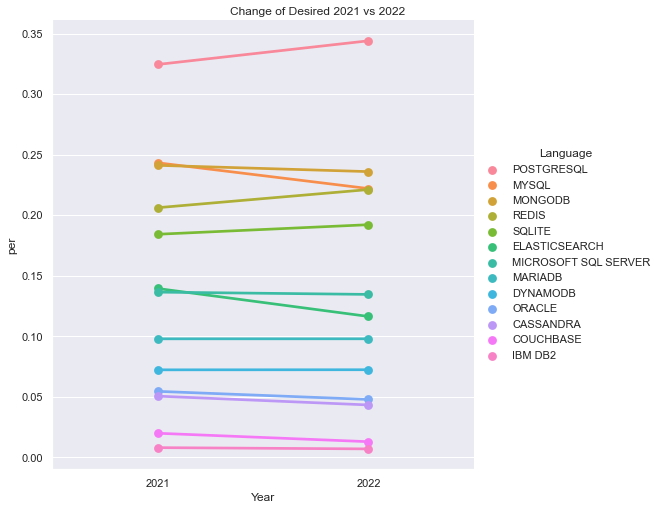

In [22]:
c = sns.catplot(data=dbc, x='Year', y='per', hue='Language', kind="point", height=7, aspect=1)
c.fig.suptitle('Change of Desired 2021 vs 2022', y=1.005)